In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
us_18 = pd.read_csv('cbp18cd.csv')
us_21 = pd.read_csv('cbp21cd.csv', thousands = ',')

In [3]:
df_us18 = ((us_18.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_18.loc[us_18['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))
df_us21 = ((us_21.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_21.loc[us_21['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [4]:
df_us18['AverageSalary_18'] = ((df_us18[' Annual Payroll ($1,000) ']*1000) / (df_us18[' Employment '])).round()
df_us21['AverageSalary_21'] = ((df_us21[' Annual Payroll ($1,000) '] * 1000) / df_us21[' Employment ']).round()

In [5]:
df_cali18 = df_us18.loc[df_us18['State'] == 'California']
df_cali21 = df_us21.loc[df_us21['State'] == 'California']

In [6]:
df_cali18

,State,116th Congressional District,NAICS Description,Number of Establishments,Employment,"Annual Payroll ($1,000)",AverageSalary_18
442,California,1.0,"Agriculture, forestry, fishing and hunting",165.0,1448.0,87386.0,60349.0
443,California,1.0,"Mining, quarrying, and oil and gas extraction",29.0,224.0,13484.0,60196.0
444,California,1.0,Utilities,55.0,1175.0,169878.0,144577.0
445,California,1.0,Construction,1942.0,10413.0,620532.0,59592.0
446,California,1.0,Manufacturing,598.0,12291.0,632497.0,51460.0
...,...,...,...,...,...,...,...
1538,California,53.0,Health care and social assistance,2623.0,70919.0,4807835.0,67793.0
1539,California,53.0,"Arts, entertainment, and recreation",263.0,7313.0,200905.0,27472.0
1540,California,53.0,Accommodation and food services,1616.0,31352.0,636454.0,20300.0
1541,California,53.0,Other services (except public administration),1538.0,14096.0,405277.0,28751.0


In [7]:
'''sns.set(rc={'figure.figsize':(22, 5)})
x = sns.boxplot(data = churn_pos_df, x ='State',y ='days_from_lastpurchase')
x.set_xticklabels(labels = churn_pos_df.State.unique(), rotation = 75,fontsize = 16);'''

"sns.set(rc={'figure.figsize':(22, 5)})\nx = sns.boxplot(data = churn_pos_df, x ='State',y ='days_from_lastpurchase')\nx.set_xticklabels(labels = churn_pos_df.State.unique(), rotation = 75,fontsize = 16);"

In [8]:
# web scrapping to get congessional districts name from web.
url = r'https://en.wikipedia.org/wiki/California%27s_congressional_districts'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')


In [9]:
cong_dis = []
for i in soup.find_all('span', style = True):
    cong_dis.append(i.text.replace('(','').replace(')',''))
cong_dis = cong_dis[2:54]
len(cong_dis)

52

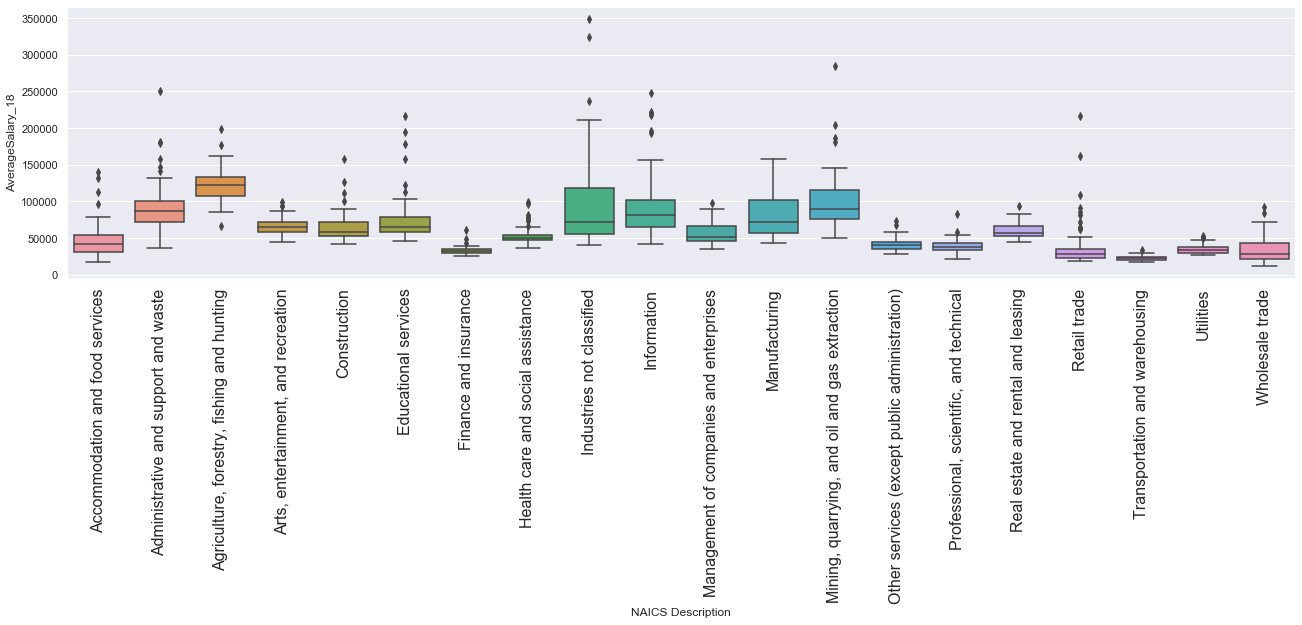

In [10]:
sns.set(rc={'figure.figsize':(22, 5)})
x = sns.boxplot(data = df_cali18, x = 'NAICS Description',y = 'AverageSalary_18') 
x.set_xticklabels(labels = df_cali18['NAICS Description'].sort_values(ascending= True).unique(), rotation = 90,fontsize = 16);

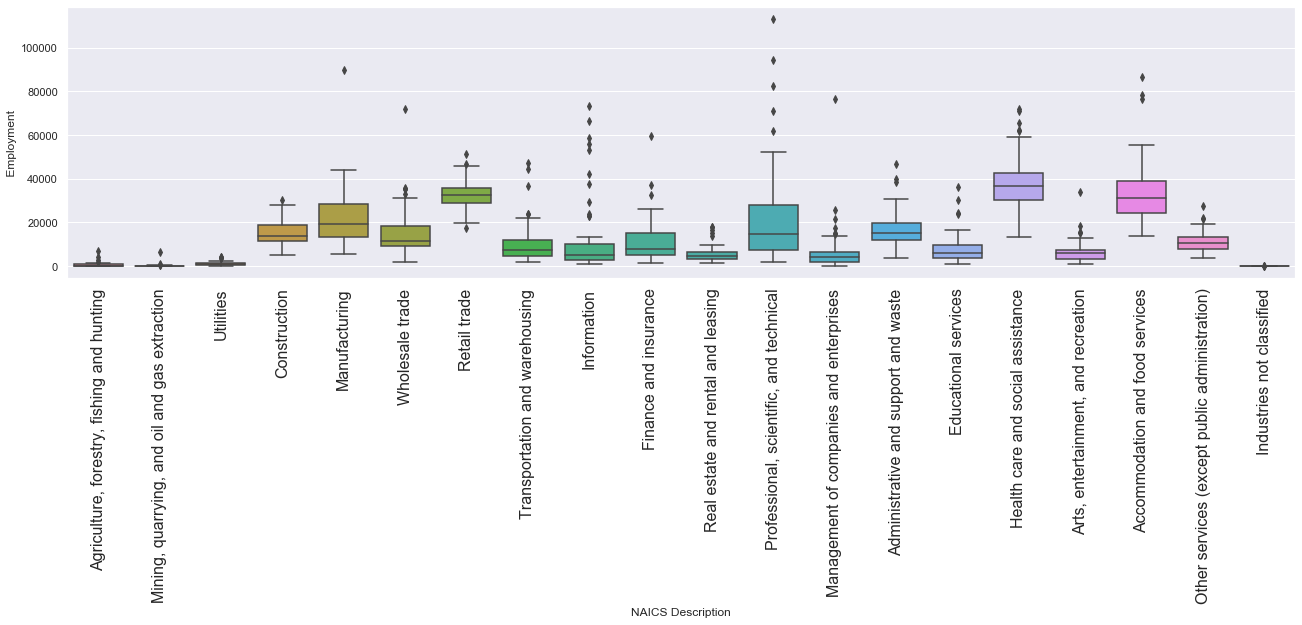

In [11]:
sns.set(rc={'figure.figsize':(22, 5)})
x = sns.boxplot(data = df_cali18, x = 'NAICS Description',y = ' Employment ') 
x.set_xticklabels(labels = df_cali18['NAICS Description'].unique(), rotation = 90,fontsize = 16);

In [12]:
df_employment = df_cali18.groupby('116th Congressional District').agg({' Employment ':np.sum}).reset_index()

In [13]:
df_employment.drop(df_employment.loc[df_employment.index == 52].index, axis=0, inplace = True)

In [14]:
df_employment.index = df_employment.index + 1

In [15]:
df_employment['116th Congressional District'] = cong_dis
#df_employment

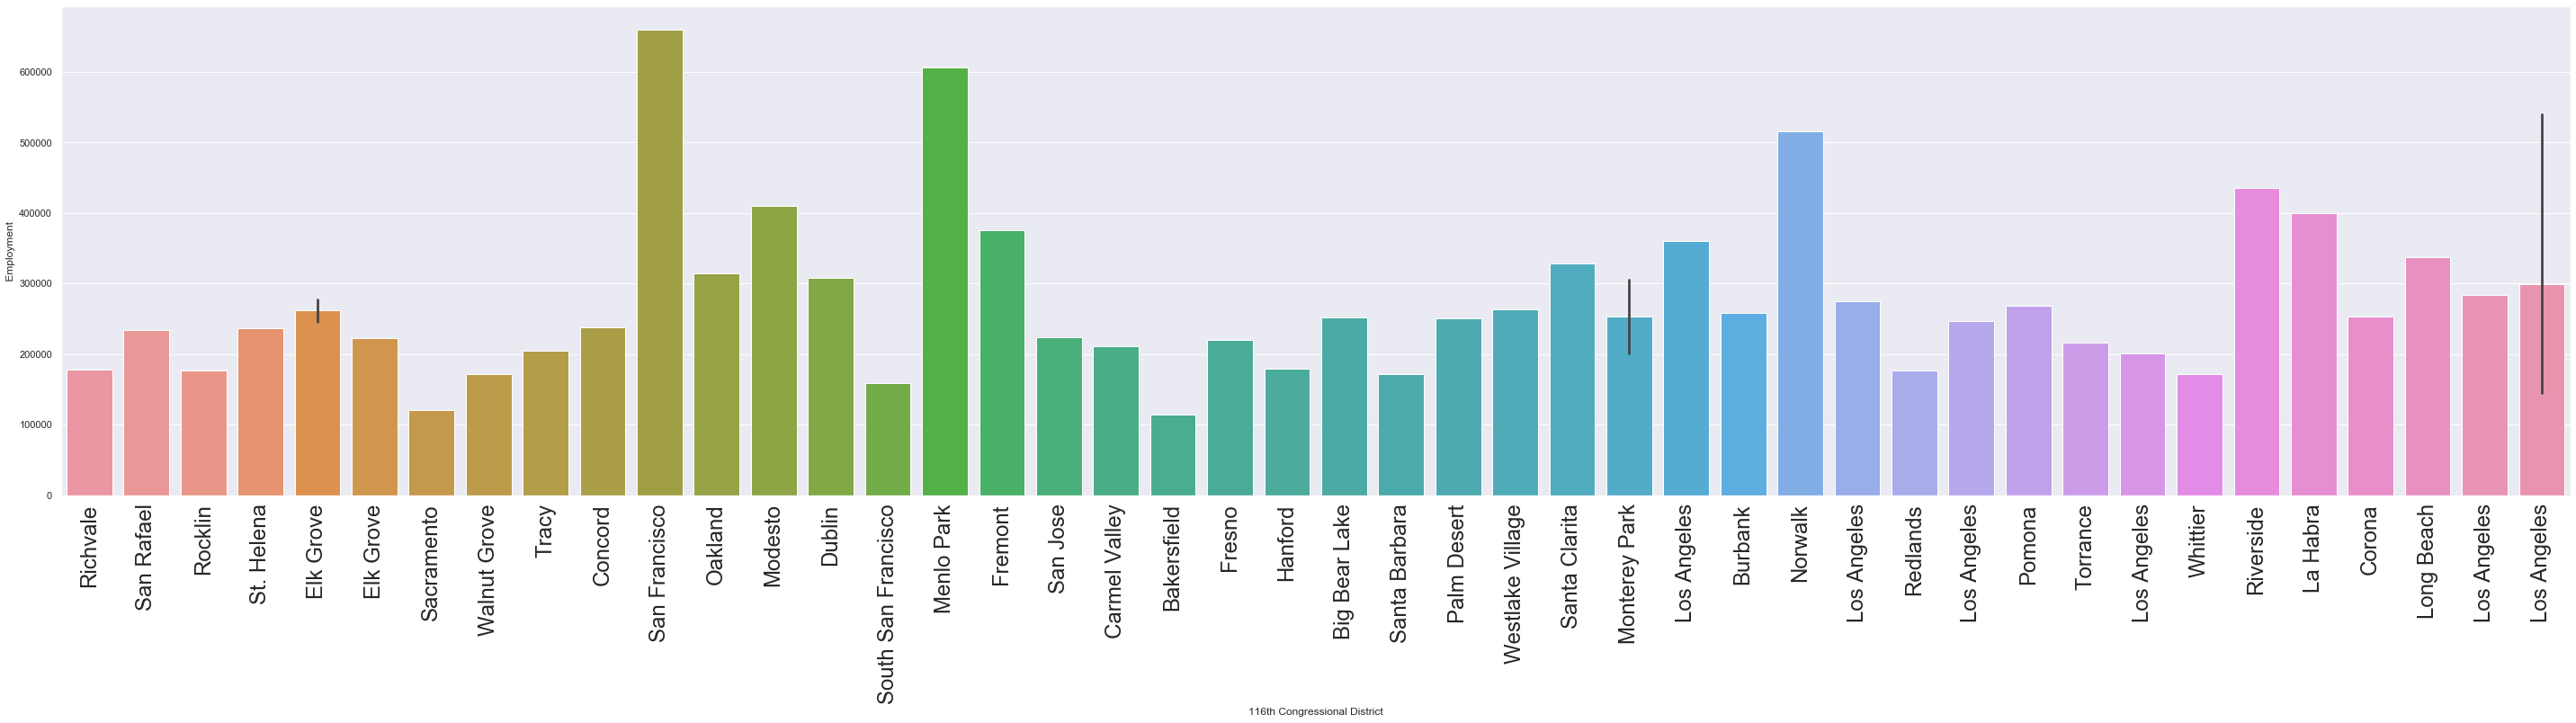

In [16]:
sns.set(rc={'figure.figsize':(50, 10)})
x = sns.barplot(data = df_employment, x = '116th Congressional District',y = ' Employment ')
sns.set_context('paper')
x.set_xticklabels(labels = df_employment['116th Congressional District'], rotation = 90,fontsize = 24);

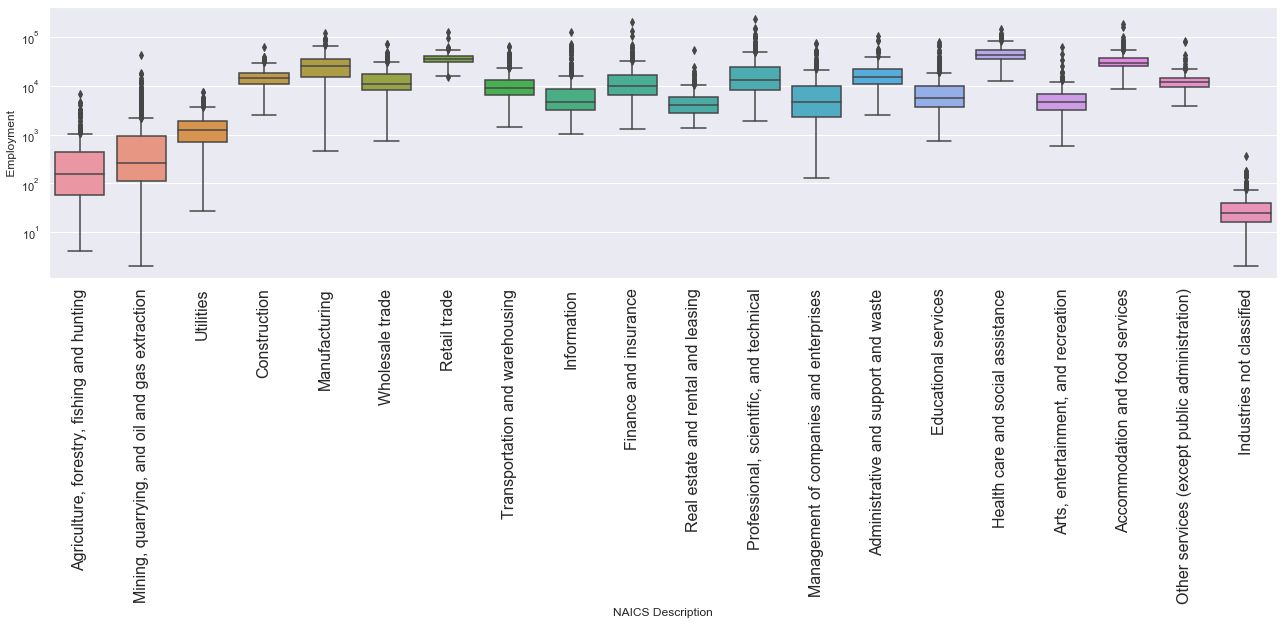

In [37]:
sns.set(rc={'figure.figsize':(22, 5)})
x = sns.boxplot(data = df_us18, x = 'NAICS Description',y = ' Employment ')
#p = [0,5000, 10000, 25000, 50000,75000, 100000]
#x.set_yscale(p)
x.set_yscale('log')
#ticks = p
#x.set_yticks(p)
x.set_xticklabels(labels = df_cali18['NAICS Description'].unique(), rotation = 90,fontsize = 16);
#x.set(yscale = 'log');